In [54]:
import numpy as np
import pandas as pd 
import math
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv("./BOM.csv", na_values="NA")

## Preprocessing

In [55]:
df['Date'] = pd.to_datetime(df['Date'])  
df['Day'] = df['Date'].dt.day  
df['Month'] = df['Date'].dt.month  
df['Year'] = df['Date'].dt.year 

df.drop(columns=['Date'], inplace=True)

df = df[['Year', 'Month', 'Day'] + [col for col in df.columns if col not in ['Year', 'Month', 'Day']]] 

df

,Year,Month,Day,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008,12,1,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008,12,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008,12,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008,12,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008,12,5,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017,6,21,Uluru,2.8,23.4,0.0,NaN,NaN,E,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017,6,22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017,6,23,Uluru,5.4,26.9,0.0,NaN,NaN,N,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017,6,24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [56]:
df.columns = range(len(df.columns))

df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,2008,12,1,Albury,13.4,22.9,0.6,NaN,NaN,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008,12,2,Albury,7.4,25.1,0.0,NaN,NaN,WNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008,12,3,Albury,12.9,25.7,0.0,NaN,NaN,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008,12,4,Albury,9.2,28.0,0.0,NaN,NaN,NE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008,12,5,Albury,17.5,32.3,1.0,NaN,NaN,W,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017,6,21,Uluru,2.8,23.4,0.0,NaN,NaN,E,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017,6,22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017,6,23,Uluru,5.4,26.9,0.0,NaN,NaN,N,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017,6,24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [57]:
cont_attr = []
dis_attr = [3, 9, 11, 12]

for i in range(23):
    if not i in dis_attr:
        cont_attr.append(i)
        
cont_attr, dis_attr

([0, 1, 2, 4, 5, 6, 7, 8, 10, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22],
 [3, 9, 11, 12])

## Filling NaN Values

In [58]:
#print("before: ", df.isna().sum())

for index in range(25):
    if index in cont_attr:
        _mean = df[index].mean()
        df[index] = df[index].replace(math.nan, _mean)
        
    else: 
        _mode = df[index].mode()[0]
        df[index] = df[index].replace(math.nan, _mode)

print("after: ", df.isna().sum())      

after:  0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64


## Normalization

In [59]:
min_max_scaler = MinMaxScaler()
x = df[cont_attr].values
x_scaled = min_max_scaler.fit_transform(x)

normalized = pd.DataFrame(x_scaled, columns=cont_attr, index=df.index)
df[cont_attr] = normalized

df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.1,1.000000,0.000000,Albury,0.516509,0.523629,0.001617,0.037712,0.524909,W,...,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,No,No
1,0.1,1.000000,0.033333,Albury,0.375000,0.565217,0.000000,0.037712,0.524909,WNW,...,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,No,No
2,0.1,1.000000,0.066667,Albury,0.504717,0.576560,0.000000,0.037712,0.524909,WSW,...,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,No,No
3,0.1,1.000000,0.100000,Albury,0.417453,0.620038,0.000000,0.037712,0.524909,NE,...,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,No,No
4,0.1,1.000000,0.133333,Albury,0.613208,0.701323,0.002695,0.037712,0.524909,W,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.0,0.454545,0.666667,Uluru,0.266509,0.533081,0.000000,0.037712,0.524909,E,...,0.51,0.24,0.728926,0.6912,0.494162,0.501103,0.364979,0.533589,No,No
145456,1.0,0.454545,0.700000,Uluru,0.285377,0.568998,0.000000,0.037712,0.524909,NNW,...,0.56,0.21,0.710744,0.6720,0.494162,0.501103,0.381857,0.573896,No,No
145457,1.0,0.454545,0.733333,Uluru,0.327830,0.599244,0.000000,0.037712,0.524909,N,...,0.53,0.24,0.669421,0.6352,0.494162,0.501103,0.415612,0.604607,No,No
145458,1.0,0.454545,0.766667,Uluru,0.384434,0.601134,0.000000,0.037712,0.524909,SE,...,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,No,No


In [60]:
ord_enc = OrdinalEncoder(dtype=np.int32)
df[23] = ord_enc.fit_transform(df[[23]])
df[24] = ord_enc.fit_transform(df[[24]])

df

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,0.1,1.000000,0.000000,Albury,0.516509,0.523629,0.001617,0.037712,0.524909,W,...,0.71,0.22,0.449587,0.4800,0.888889,0.501103,0.508439,0.522073,0,0
1,0.1,1.000000,0.033333,Albury,0.375000,0.565217,0.000000,0.037712,0.524909,WNW,...,0.44,0.25,0.497521,0.4912,0.494162,0.501103,0.514768,0.570058,0,0
2,0.1,1.000000,0.066667,Albury,0.504717,0.576560,0.000000,0.037712,0.524909,WSW,...,0.38,0.30,0.447934,0.5056,0.494162,0.222222,0.594937,0.548944,0,0
3,0.1,1.000000,0.100000,Albury,0.417453,0.620038,0.000000,0.037712,0.524909,NE,...,0.45,0.16,0.613223,0.5712,0.494162,0.501103,0.533755,0.612284,0,0
4,0.1,1.000000,0.133333,Albury,0.613208,0.701323,0.002695,0.037712,0.524909,W,...,0.82,0.33,0.500826,0.4624,0.777778,0.888889,0.527426,0.673704,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.0,0.454545,0.666667,Uluru,0.266509,0.533081,0.000000,0.037712,0.524909,E,...,0.51,0.24,0.728926,0.6912,0.494162,0.501103,0.364979,0.533589,0,0
145456,1.0,0.454545,0.700000,Uluru,0.285377,0.568998,0.000000,0.037712,0.524909,NNW,...,0.56,0.21,0.710744,0.6720,0.494162,0.501103,0.381857,0.573896,0,0
145457,1.0,0.454545,0.733333,Uluru,0.327830,0.599244,0.000000,0.037712,0.524909,N,...,0.53,0.24,0.669421,0.6352,0.494162,0.501103,0.415612,0.604607,0,0
145458,1.0,0.454545,0.766667,Uluru,0.384434,0.601134,0.000000,0.037712,0.524909,SE,...,0.51,0.24,0.642975,0.6304,0.333333,0.222222,0.470464,0.602687,0,0


In [61]:
one_hot = pd.get_dummies(df[dis_attr])
df = df.drop(dis_attr, axis=1)
X = df.join(one_hot)

X

,0,1,2,4,5,6,7,8,10,13,...,12_NNW,12_NW,12_S,12_SE,12_SSE,12_SSW,12_SW,12_W,12_WNW,12_WSW
0,0.1,1.000000,0.000000,0.516509,0.523629,0.001617,0.037712,0.524909,0.294574,0.153846,...,False,False,False,False,False,False,False,False,True,False
1,0.1,1.000000,0.033333,0.375000,0.565217,0.000000,0.037712,0.524909,0.294574,0.030769,...,False,False,False,False,False,False,False,False,False,True
2,0.1,1.000000,0.066667,0.504717,0.576560,0.000000,0.037712,0.524909,0.310078,0.146154,...,False,False,False,False,False,False,False,False,False,True
3,0.1,1.000000,0.100000,0.417453,0.620038,0.000000,0.037712,0.524909,0.139535,0.084615,...,False,False,False,False,False,False,False,False,False,False
4,0.1,1.000000,0.133333,0.613208,0.701323,0.002695,0.037712,0.524909,0.271318,0.053846,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,1.0,0.454545,0.666667,0.266509,0.533081,0.000000,0.037712,0.524909,0.193798,0.100000,...,False,False,False,False,False,False,False,False,False,False
145456,1.0,0.454545,0.700000,0.285377,0.568998,0.000000,0.037712,0.524909,0.124031,0.100000,...,False,False,False,False,False,False,False,False,False,False
145457,1.0,0.454545,0.733333,0.327830,0.599244,0.000000,0.037712,0.524909,0.240310,0.069231,...,False,False,False,False,False,False,False,False,True,False
145458,1.0,0.454545,0.766667,0.384434,0.601134,0.000000,0.037712,0.524909,0.170543,0.100000,...,False,False,False,False,False,False,False,False,False,False


## Train/Test

In [62]:
Y = np.array(X.pop(24))
X = np.array(X)
print(X.shape, Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print(X_test.shape, X_train.shape)

(145460, 117) (145460,)
(29092, 117) (116368, 117)


## 1) KNN Model

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

score = f1_score(Y_test, knn.predict(X_test))
print(score)

0.4343368440674807


In [64]:
list_of_f1_scores = []

for index in range(1, 21):
    _knn = KNeighborsClassifier(n_neighbors=index)
    _knn.fit(X_train, Y_train)
    f1 = f1_score(Y_test, _knn.predict(X_test))
    list_of_f1_scores.append(f1)
    print(index, f1)

1 0.42825822168087696
2 0.3040259139287367
3 0.4343368440674807
4 0.340333749574299
5 0.4268798105387803
6 0.3489400294751162
7 0.42122448979591837
8 0.3577772716920975
9 0.41694630872483224
10 0.357314422966945
11 0.4120025537348372
12 0.36407432897453545
13 0.398744452862864
14 0.3561454125793422
15 0.3978118161925602
16 0.3556121857986795
17 0.39435377150419054
18 0.3557714550080962
19 0.39035769828926903
20 0.3566952889301462


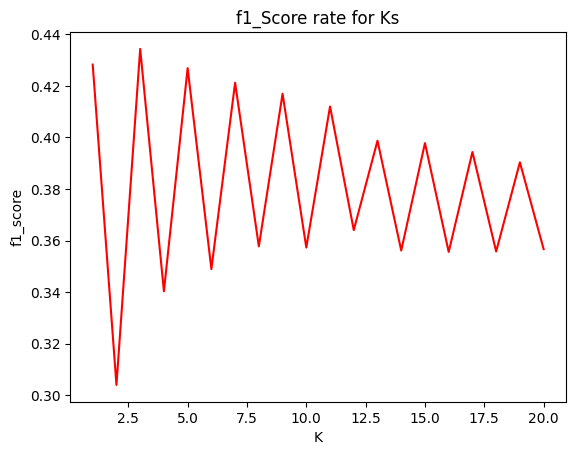

In [65]:
plt.plot(list(range(1, 21)), list_of_f1_scores, color="red")
plt.xlabel("K")
plt.ylabel("f1_score")
plt.title("f1_Score rate for Ks")
plt.show()

In [66]:
scores = np.array(list_of_f1_scores)
index_max = np.argmax(scores) + 1
print(index_max)

3


## 2) Decision Tree Model

In [67]:
dt = DecisionTreeClassifier(criterion="entropy", max_depth=8)
dt.fit(X_train, Y_train)

score = f1_score(Y_test, dt.predict(X_test))
print(score)

0.579014598540146


In [68]:
list_of_f1_scores = []

for index in range(1, 21):
    _dt = DecisionTreeClassifier(criterion="entropy", max_depth=index)
    _dt.fit(X_train, Y_train)
    f1 = f1_score(Y_test, _dt.predict(X_test))
    list_of_f1_scores.append(f1)
    print(index, f1)

1 0.5469331914570191
2 0.4169962707650582
3 0.5229567536673652
4 0.5391969407265774
5 0.5665743305632502
6 0.5605562341445082
7 0.5524596464258262
8 0.5788849347568209
9 0.5663931368892204
10 0.5614100531567658
11 0.5668778280542986
12 0.5626922381038538
13 0.5609232420826624
14 0.5605274725274725
15 0.556826980985976
16 0.553639684022764
17 0.5514485514485514
18 0.5444628099173554
19 0.5424778040237843
20 0.5401459854014599


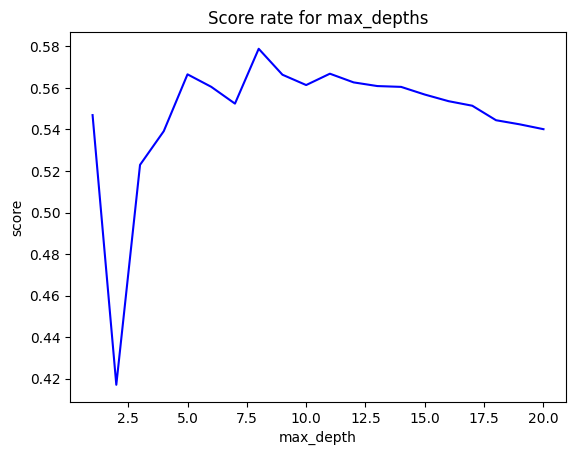

In [69]:
plt.plot(list(range(1, 21)), list_of_f1_scores, color="blue")
plt.xlabel("max_depth")
plt.ylabel("score")
plt.title("Score rate for max_depths")
plt.show()

In [70]:
scores = np.array(list_of_f1_scores)
index_max = np.argmax(scores) + 1
print(index_max)

8
